In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# The QuantStudio outputs some calculated results, which is helpful. Just printing a subset of them here.
results = pd.read_excel('data/051420/SARS-CoV-2 051420_Results_20200515 002830.xls', sheet_name='Data')
cols = ['Well', 'Well Position', 'Sample', 'Cq', 'Cq Confidence', 'Cq Mean', 'Cq SD',]
results[cols]

,Well,Well Position,Sample,Cq,Cq Confidence,Cq Mean,Cq SD
0,1,A1,Negative Control 1,Undetermined,0.000000,NaN,NaN
1,2,A2,Negative Control 1,Undetermined,0.000000,NaN,NaN
2,3,A3,Positive Control 1,17.054,0.985661,16.958635,0.134898
3,4,A4,Positive Control 1,16.8632,0.990974,16.958635,0.134898
4,13,B1,Negative Control 2,Undetermined,0.000000,NaN,NaN
5,14,B2,Negative Control 2,Undetermined,0.000000,NaN,NaN
6,15,B3,Positive Control 2,18.9833,0.988849,19.019336,0.050992
7,16,B4,Positive Control 2,19.0554,0.982598,19.019336,0.050992


In [3]:
# Load the underlying data to make a simple plot
data_df = pd.read_excel('data/051420/SARS-CoV-2 051420_Amplification Data_20200515 002830.xls', sheet_name='Data')
samples = sorted(data_df['Sample'].unique())
pal = sns.color_palette('dark')
cmap = dict((s, pal[i]) for i, s in enumerate(samples))

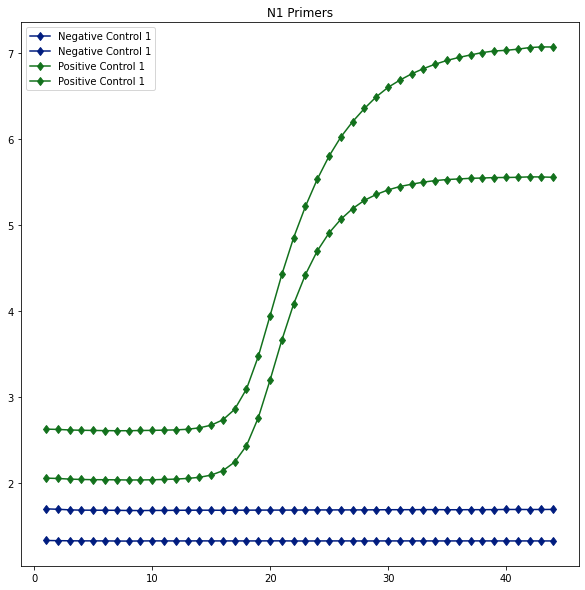

In [4]:
fig = plt.figure(figsize=(10,10))

samples_names = ['Negative Control 1', 'Positive Control 1']

sub_df = data_df[data_df['Sample'].isin(samples_names)]
grouped = sub_df.groupby('Well')
for wid, wdf in grouped:
    s = wdf['Sample'].values[0] 
    c = cmap.get(s)
    plt.plot(wdf['Cycle Number'], wdf['Rn'], color=c, marker='d', label=s)
    
plt.legend()
plt.title('N1 Primers', fontsize=12)
plt.savefig('figs/051420/N1_primers.png')
plt.show()

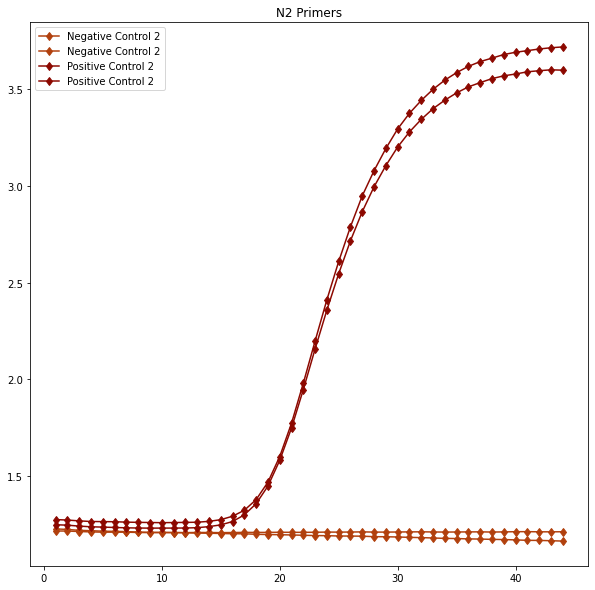

In [5]:
fig = plt.figure(figsize=(10,10))

samples_names = ['Negative Control 2', 'Positive Control 2']

sub_df = data_df[data_df['Sample'].isin(samples_names)]
grouped = sub_df.groupby('Well')
for wid, wdf in grouped:
    s = wdf['Sample'].values[0] 
    c = cmap.get(s)
    plt.plot(wdf['Cycle Number'], wdf['Rn'], color=c, marker='d', label=s)

plt.title('N2 Primers', fontsize=12)
plt.legend()
plt.savefig('figs/051420/N2_primers.png')
plt.show()